<a href="https://colab.research.google.com/github/DavidCarrion666/Proyecto-Individual---M-dulo-Deep-Learning/blob/main/Proyecto_Deteccion_Carrion_David_DeteccionYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Animales con YOLOv8
Este notebook entrena y evalúa modelos YOLOv8 usando el dataset de animales con anotaciones en formato YOLO.


## 1. Instalación de Ultralytics YOLO
Instalamos la librería `ultralytics` para usar YOLOv8 y verificamos la versión.


In [5]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.9 MB/s eta 0:00:00


## 2. Preparación del dataset
El dataset fue copiado desde Kaggle con `kagglehub` a la ruta:
`/content/datasets/animals/Animal`

Estructura:
- `train/images` y `train/labels`
- `valid/images` y `valid/labels`
- `animal.yaml` con rutas y clases

Direccion de dataset:https://www.kaggle.com/datasets/lokeshvloki/animal-dataset-image-with-annotation


In [1]:
import kagglehub

path = kagglehub.dataset_download("lokeshvloki/animal-dataset-image-with-annotation")

print("Path to dataset files:", path)


100%|██████████| 147M/147M [00:01<00:00, 128MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lokeshvloki/animal-dataset-image-with-annotation/versions/1


## 3. Copiar dataset a la carpeta de trabajo
El dataset descargado con `kagglehub` se encuentra en una ruta temporal (`path`).  
Lo copiamos a `/content/datasets/animals` para tener una ruta fija y ordenada dentro de Colab.


## 3.1 Ajuste del archivo YAML
El archivo `animal.yaml` que viene con el dataset contiene rutas que apuntan a otra ubicación
(por ejemplo: `../drive/MyDrive/...`).

Es necesario editarlo para que apunte a la carpeta real del dataset en Colab:
path: /content/datasets/animals/Animal
train: train/images
val: valid/images


In [2]:
import shutil

shutil.copytree(
    path,
    "/content/datasets/animals",
    dirs_exist_ok=True
)


'/content/datasets/animals'

## 4.1 Entrenamiento con YOLOv8n
Entrenamos YOLOv8n durante 50 épocas con imágenes de 640x640 y batch size de 16.


In [8]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/animals/Animal/animal.yaml epochs=50 imgsz=640 batch=16


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/animals/Animal/animal.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/detect/train/results.csv")

print(df.head())


   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   25.4741         1.14444         3.56595         1.58484   
1      2   47.4655         1.21055         2.67691         1.59256   
2      3   68.0669         1.19786         2.35625         1.58345   
3      4   89.8537         1.19581         2.19063         1.58982   
4      5  111.4940         1.14819         2.08872         1.54396   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00821            0.93573           0.17732   
1               0.34608            0.43955           0.35020   
2               0.30626            0.50147           0.37541   
3               0.58904            0.50389           0.52769   
4               0.49304            0.56130           0.53130   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.08805       1.29111       3.13715       1.97703  0.000205   
1              0.18182       1.41765  

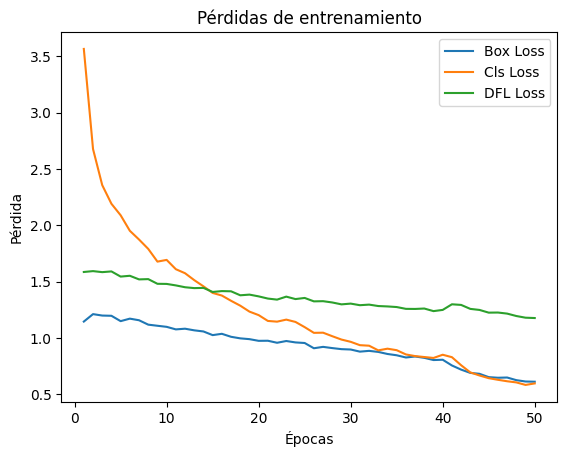

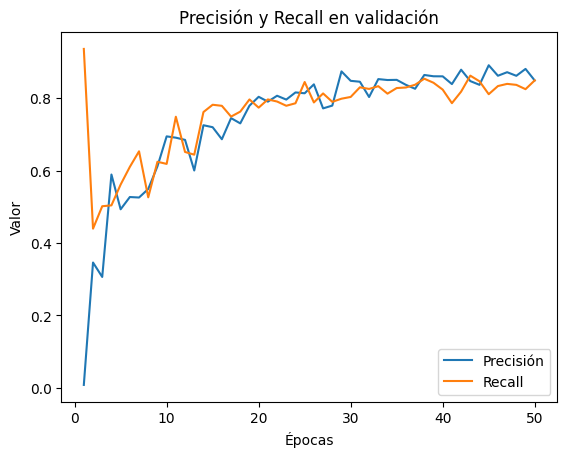

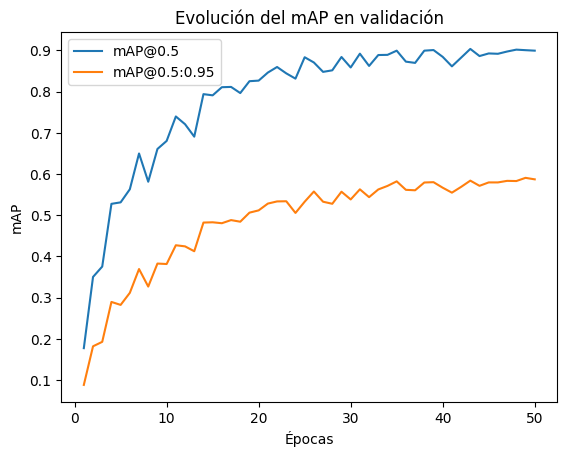

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/detect/train/results.csv")


plt.plot(df["epoch"], df["train/box_loss"], label="Box Loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="Cls Loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="DFL Loss")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdidas de entrenamiento")
plt.legend()
plt.show()


plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precisión")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Precisión y Recall en validación")
plt.legend()
plt.show()


plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")
plt.xlabel("Épocas")
plt.ylabel("mAP")
plt.title("Evolución del mAP en validación")
plt.legend()
plt.show()


In [12]:
import pandas as pd

df = pd.read_csv("runs/detect/train/results.csv")

metrics = df[[
    "epoch",
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)"
]]

print("=== Últimas 5 épocas ===")
print(metrics.tail())

print("\n=== Estadísticas generales ===")
print(metrics.describe()[["metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]])


=== Últimas 5 épocas ===
    epoch  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
45     46               0.86168            0.83321           0.89201   
46     47               0.87144            0.83923           0.89752   
47     48               0.86152            0.83651           0.90209   
48     49               0.88054            0.82461           0.90078   
49     50               0.84858            0.84891           0.89960   

    metrics/mAP50-95(B)  
45              0.57969  
46              0.58349  
47              0.58303  
48              0.59081  
49              0.58715  

=== Estadísticas generales ===
       metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
count             50.000000          50.000000         50.000000   
mean               0.740156           0.760533          0.785321   
std                0.173178           0.109235          0.162098   
min                0.008210           0.439550          0.177320   
25%           

## 4.2 Entrenamiento con YOLOv8s

En esta celda entrenamos el modelo **YOLOv8s (small)** usando el dataset de animales.  
- `epochs=50`: se entrena durante 50 épocas.  
- `imgsz=640`: las imágenes se redimensionan a 640x640.  
- `batch=16`: se procesan 16 imágenes por lote.  
- `project=runs/detect`: carpeta raíz donde se guardan los resultados.  
- `name=train2`: nombre del experimento para evitar sobrescribir resultados previos (se almacenará en `runs/detect/train2/`).  


In [16]:
!yolo task=detect mode=train \
    model=yolov8s.pt \
    data=/content/datasets/animals/Animal/animal.yaml \
    epochs=50 imgsz=640 batch=16 \
    project=runs/detect \
    name=train2

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/animals/Animal/animal.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

## 4.3 Entrenamiento con YOLOv8m

En esta celda entrenamos el modelo **YOLOv8m (medium)** sobre el dataset de animales.  
Parámetros principales:  
- `epochs=50`: número de épocas de entrenamiento.  
- `imgsz=640`: las imágenes se redimensionan a 640x640 píxeles.  
- `batch=16`: tamaño de lote de 16 imágenes.  
- `project=runs/detect`: carpeta raíz donde se guardarán los resultados.  
- `name=train3`: nombre de este experimento, lo que asegura que los resultados se guarden en `runs/detect/train3/` sin sobrescribir experimentos previos.  


In [17]:
!yolo task=detect mode=train \
    model=yolov8m.pt \
    data=/content/datasets/animals/Animal/animal.yaml \
    epochs=50 imgsz=640 batch=16 \
    project=runs/detect \
    name=train3


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/animals/Animal/animal.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

## 5. Evaluación del modelo

Evaluamos el modelo en el conjunto de validación (`val`) para obtener:
- Precisión
- Recall
- mAP@0.5
- mAP@0.5:0.95

Además, YOLO genera automáticamente:
- `results.png` (curvas de métricas por época)
- `confusion_matrix.png` (matriz de confusión)
- PR-curves por clase


In [19]:
import pandas as pd

paths = {
    "YOLOv8n": "runs/detect/train/results.csv",
    "YOLOv8s": "runs/detect/train2/results.csv",
    "YOLOv8m": "runs/detect/train3/results.csv"
}

results_summary = {}

for model, path in paths.items():
    df = pd.read_csv(path)
    results_summary[model] = {
        "Precision (max)": df["metrics/precision(B)"].max(),
        "Recall (max)": df["metrics/recall(B)"].max(),
        "mAP@0.5 (max)": df["metrics/mAP50(B)"].max(),
        "mAP@0.5:0.95 (max)": df["metrics/mAP50-95(B)"].max()
    }

summary_df = pd.DataFrame(results_summary).T

print("=== Comparación de métricas finales por modelo ===")
print(summary_df.round(3))


=== Comparación de métricas finales por modelo ===
         Precision (max)  Recall (max)  mAP@0.5 (max)  mAP@0.5:0.95 (max)
YOLOv8n            0.891         0.936          0.904               0.591
YOLOv8s            0.866         0.883          0.893               0.602
YOLOv8m            0.899         0.902          0.927               0.618


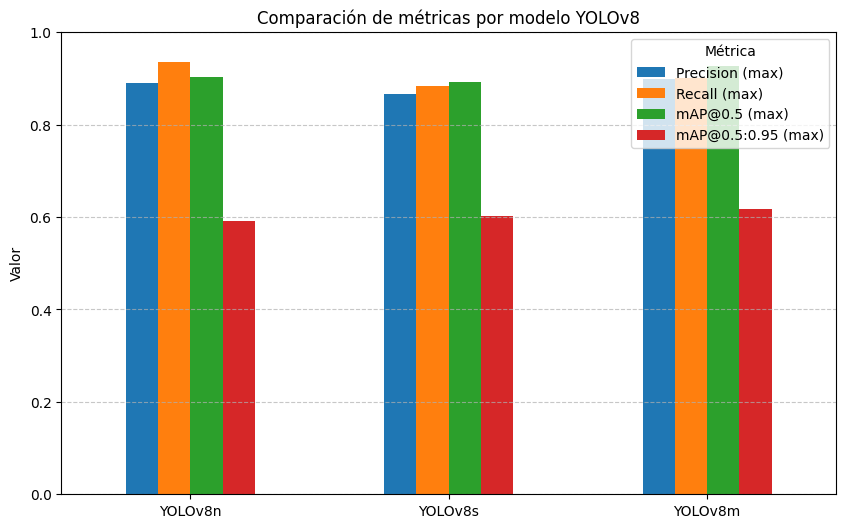

In [20]:
import matplotlib.pyplot as plt

summary_df = summary_df.round(3)

summary_df.plot(kind="bar", figsize=(10,6))
plt.title("Comparación de métricas por modelo YOLOv8")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.legend(title="Métrica")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## 6. Inferencia de ejemplo

En esta sección mostramos ejemplos visuales de inferencia con los modelos entrenados
(YOLOv8n, YOLOv8s y YOLOv8m).  

Cada imagen contiene:  
- Cajas delimitadoras en torno a los animales detectados.  
- El nombre de la clase predicha (ej. *Tiger, Lion, Elephant*).  
- El nivel de confianza asociado a la predicción.  

A continuación se presentan capturas de los resultados obtenidos en el conjunto de validación,
con el objetivo de ilustrar cómo el modelo reconoce diferentes especies en condiciones reales.  


In [26]:

!yolo task=detect mode=predict \
    model=runs/detect/train/weights/best.pt \
    source=/content/datasets/animals/Animal/valid/images \
    save=True conf=0.25 project=runs/detect name=predict_n

!yolo task=detect mode=predict \
    model=runs/detect/train2/weights/best.pt \
    source=/content/datasets/animals/Animal/valid/images \
    save=True conf=0.25 project=runs/detect name=predict_s

!yolo task=detect mode=predict \
    model=runs/detect/train3/weights/best.pt \
    source=/content/datasets/animals/Animal/valid/images \
    save=True conf=0.25 project=runs/detect name=predict_m


Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs

image 1/408 /content/datasets/animals/Animal/valid/images/00000009_300resized.png: 640x640 1 Tiger, 8.2ms
image 2/408 /content/datasets/animals/Animal/valid/images/00000010_300resized.png: 640x640 1 Tiger, 7.4ms
image 3/408 /content/datasets/animals/Animal/valid/images/00000011_300resized.png: 640x640 1 Tiger, 7.3ms
image 4/408 /content/datasets/animals/Animal/valid/images/00000015_300resized.png: 640x640 1 Tiger, 7.3ms
image 5/408 /content/datasets/animals/Animal/valid/images/00000016_300resized.png: 640x640 1 Tiger, 7.3ms
image 6/408 /content/datasets/animals/Animal/valid/images/00000017_300resized.png: 640x640 1 Lion, 1 Tiger, 7.3ms
image 7/408 /content/datasets/animals/Animal/valid/images/00000018_300resized.png: 640x640 1 Tiger, 7.3ms
image 8/408 /content/datasets/animals/Animal/valid/images/00000019_300resized.png: 640

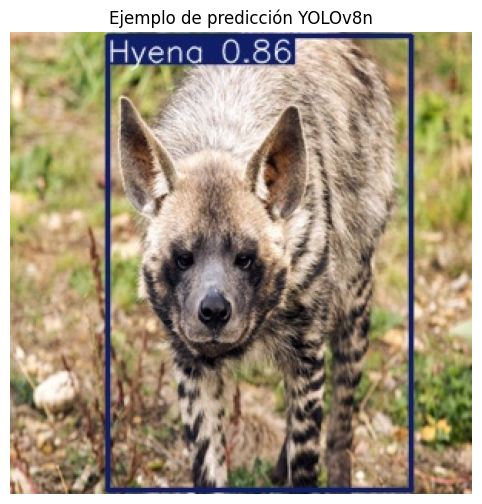

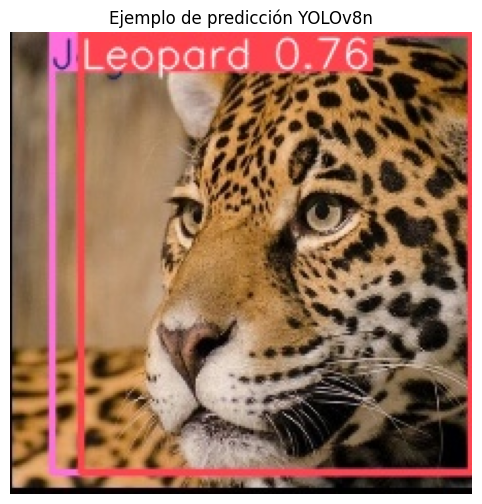

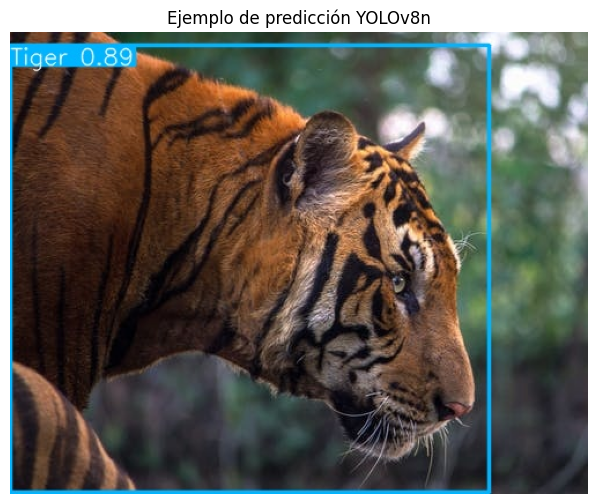

In [27]:
import cv2
import matplotlib.pyplot as plt
import glob


pred_images = glob.glob("runs/detect/predict_n/*.jpg")[:3]

for img_path in pred_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Ejemplo de predicción YOLOv8n")
    plt.show()


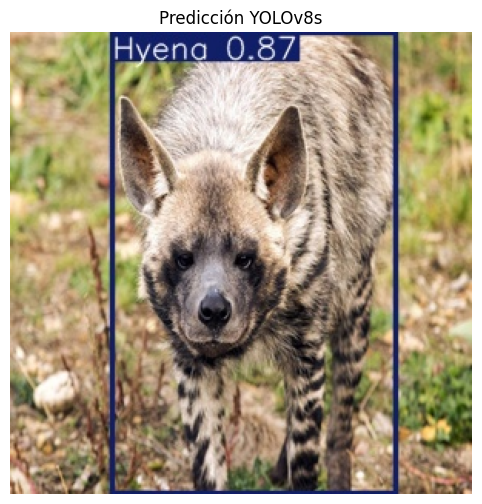

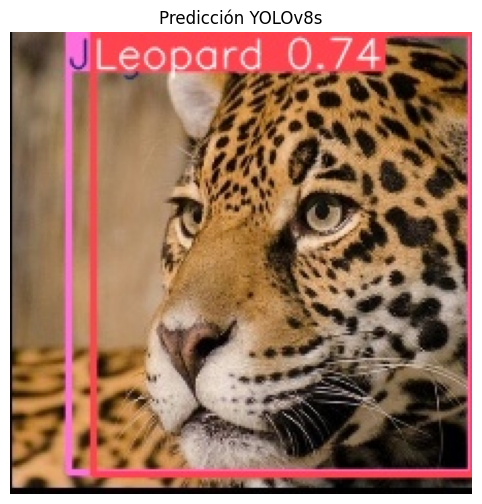

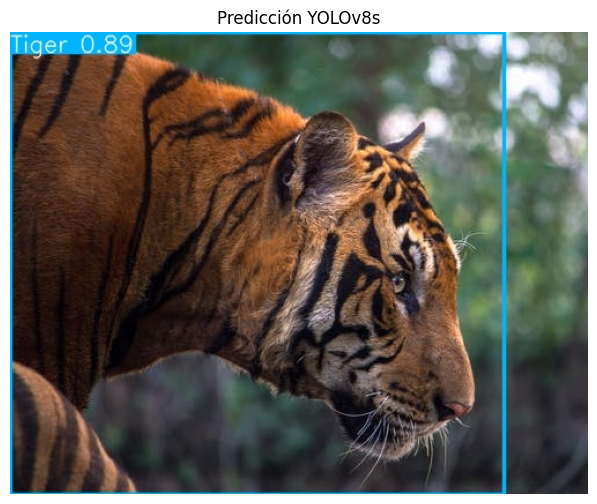

In [29]:
pred_images = glob.glob("runs/detect/predict_s/*.jpg")[:3]

for img_path in pred_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Predicción YOLOv8s")
    plt.show()


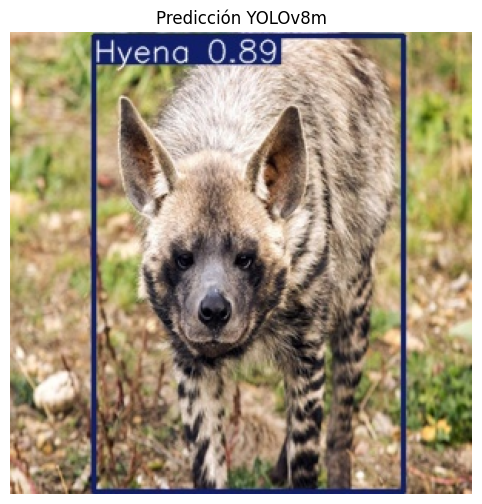

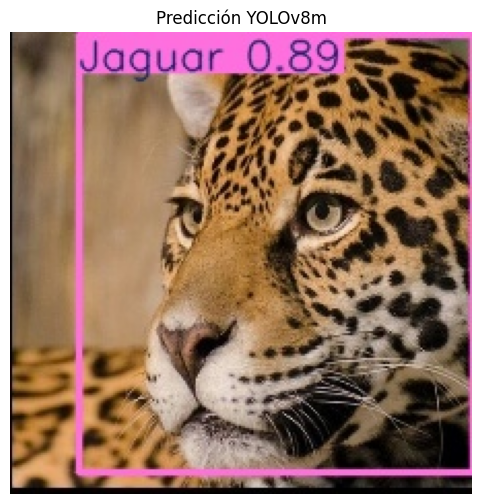

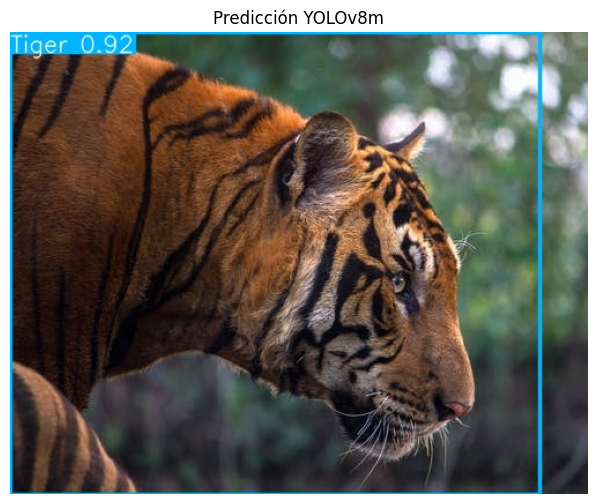

In [30]:
pred_images = glob.glob("runs/detect/predict_m/*.jpg")[:3]

for img_path in pred_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Predicción YOLOv8m")
    plt.show()


## 7. Guardado de resultados

Todos los resultados obtenidos durante el entrenamiento, evaluación e inferencia
fueron organizados en la carpeta `/results`, con una subcarpeta por cada modelo
(YOLOv8n, YOLOv8s, YOLOv8m).

Cada carpeta contiene:
- **results.csv** → métricas detalladas por época.
- **results.png** → curvas de entrenamiento y validación.
- **confusion_matrix.png** → matriz de confusión final.
- **weights/** → pesos del modelo (`best.pt` y `last.pt`).
- **predictions/** → ejemplos visuales de inferencia.

Finalmente, todos los archivos se comprimieron en `results_all_models.zip`
para facilitar su descarga e inclusión en el informe.


In [31]:
!mkdir -p /content/results


In [32]:

!cp -r runs/detect/train /content/results/yolov8n

!cp -r runs/detect/train2 /content/results/yolov8s

!cp -r runs/detect/train3 /content/results/yolov8m

!cp -r runs/detect/predict_n /content/results/yolov8n/predictions
!cp -r runs/detect/predict_s /content/results/yolov8s/predictions
!cp -r runs/detect/predict_m /content/results/yolov8m/predictions


In [33]:
!zip -r results_all_models.zip /content/results

from google.colab import files
files.download("results_all_models.zip")


  adding: content/results/ (stored 0%)
  adding: content/results/yolov8m/ (stored 0%)
  adding: content/results/yolov8m/val_batch0_pred.jpg (deflated 7%)
  adding: content/results/yolov8m/train_batch2562.jpg (deflated 9%)
  adding: content/results/yolov8m/args.yaml (deflated 53%)
  adding: content/results/yolov8m/confusion_matrix.png (deflated 21%)
  adding: content/results/yolov8m/val_batch1_pred.jpg (deflated 10%)
  adding: content/results/yolov8m/weights/ (stored 0%)
  adding: content/results/yolov8m/weights/best.pt (deflated 8%)
  adding: content/results/yolov8m/weights/last.pt (deflated 8%)
  adding: content/results/yolov8m/results.png (deflated 7%)
  adding: content/results/yolov8m/val_batch1_labels.jpg (deflated 10%)
  adding: content/results/yolov8m/BoxR_curve.png (deflated 7%)
  adding: content/results/yolov8m/BoxP_curve.png (deflated 7%)
  adding: content/results/yolov8m/BoxPR_curve.png (deflated 12%)
  adding: content/results/yolov8m/train_batch2.jpg (deflated 2%)
  adding: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
!git add .
!git commit -m "Añadir notebook y resultados (test1, test2, test3)"
!git push origin main


On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
